# Feature Engineering and Modelling for churn
Exercise done for BCG Data Science Completion Certificate on 22.11.2024

Customer churn analysis simulation for XYZ Analytics, 
demonstrating advanced data analytics skills, identifying essential client data and outlining a strategic investigation approach.

1. Import packages
2. Load data
3. Modelling

Author : Tiago G. Russomanno


In [2]:
## 1. Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline



---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# Modelling 

the current dataset was already cleaned and has already some new features for training and testing

In [4]:
# libraries

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Data sampling

The first thing we want to do is split our dataset into training and test samples. 


In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


### Model training suggested 

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

## Model Evaluation using Confusion matrix


In [12]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2614    3]
 [ 288   17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.85      0.06      0.10       305

    accuracy                           0.90      2922
   macro avg       0.88      0.53      0.53      2922
weighted avg       0.90      0.90      0.86      2922


Accuracy Score:
0.9004106776180698


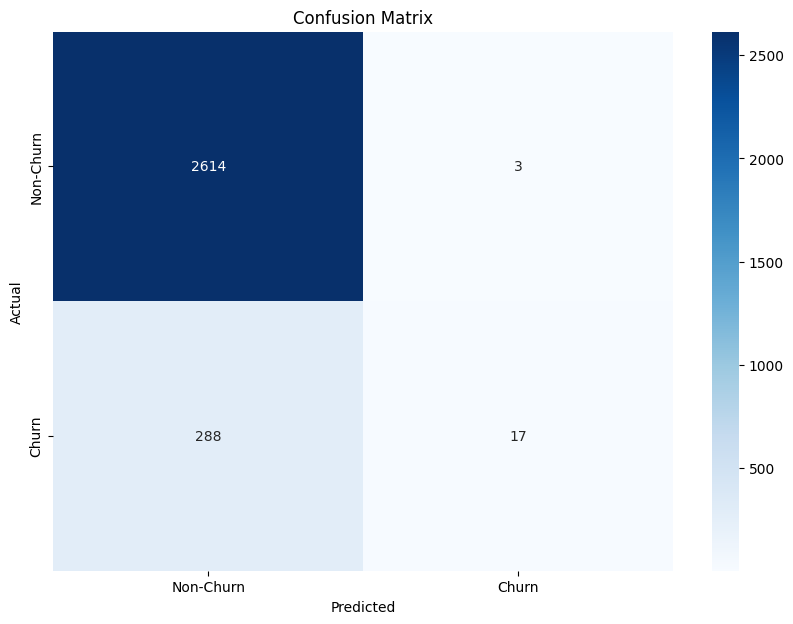

In [13]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [14]:
predictions = rf_model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 17
False positives: 3
True negatives: 2614
False negatives: 288

Accuracy: 0.9004106776180698
Precision: 0.85
Recall: 0.05573770491803279


## Explaining the results
Interpretation:

- True Negatives (TN): 2614 instances were correctly classified as not churning.
- False Positives (FP): 3 instances were incorrectly classified as churning (Type I error).
- False Negatives (FN): 288 instances were incorrectly classified as not churning (Type II error).
- True Positives (TP): 17 instances were correctly classified as churning.


Overall:
- 90.04% of the predictions were correct.


The model performs well in identifying negative cases (high precision and recall for class 0). 
The model struggles to correctly identify positive cases (low recall for class 1). This indicates a class imbalance issue, where the negative class is significantly more frequent than the positive class.

The model performs well in identifying negative cases (high precision and recall for class 0). However, it struggles to correctly identify positive cases (low recall for class 1). This indicates a class imbalance issue, where the negative class is significantly more frequent than the positive class.

### New model to improve the performance

The model performs reasonably well on the majority class (non-churn) but struggles with the minority class (churn).
The low recall for the churn class indicates that the model misses many actual churn cases.
The low precision for the churn class suggests that many predicted churn cases are actually non-churn.

In order to look for the model evaluation the appropriate metrics for imbalanced datasets, would be as F1-score, ROC-AUC, and precision-recall curve.

F1 Score: 0.10461538461538461
ROC-AUC Score: 0.5272956770673465
Precision-Recall AUC: 0.5021501666273942


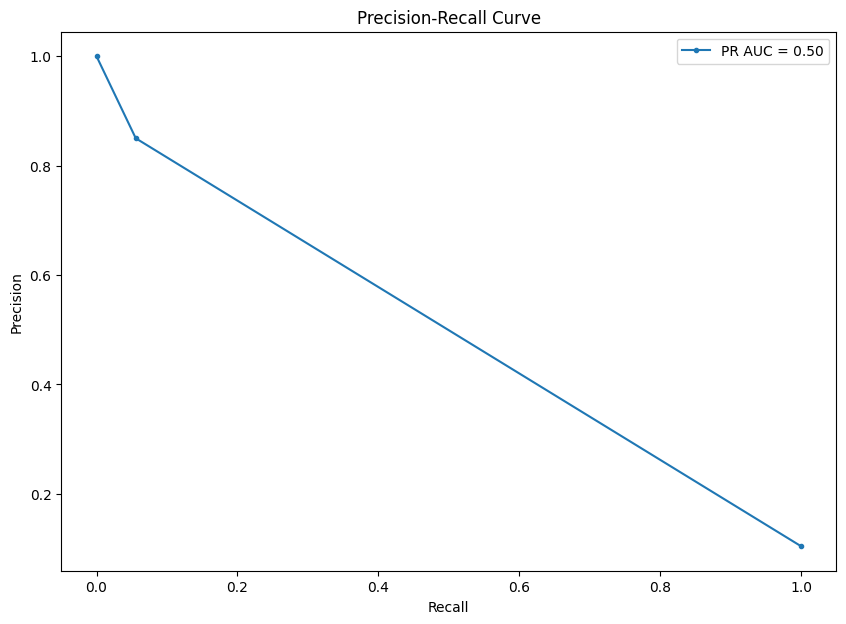

In [11]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


An ROC-AUC score of 0.52 indicates that the model's performance is only slightly better than random guessing. 

This suggests that the model is not effective in discriminating between the two classes.
The low Precision-Recall AUC suggests that the model has difficulty in accurately identifying positive instances, leading to a high number of false positives or false negatives.
 
Also the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 

Probabbly the feature enginerring in the dataset was not enought. 



In [17]:
# checking features importance
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

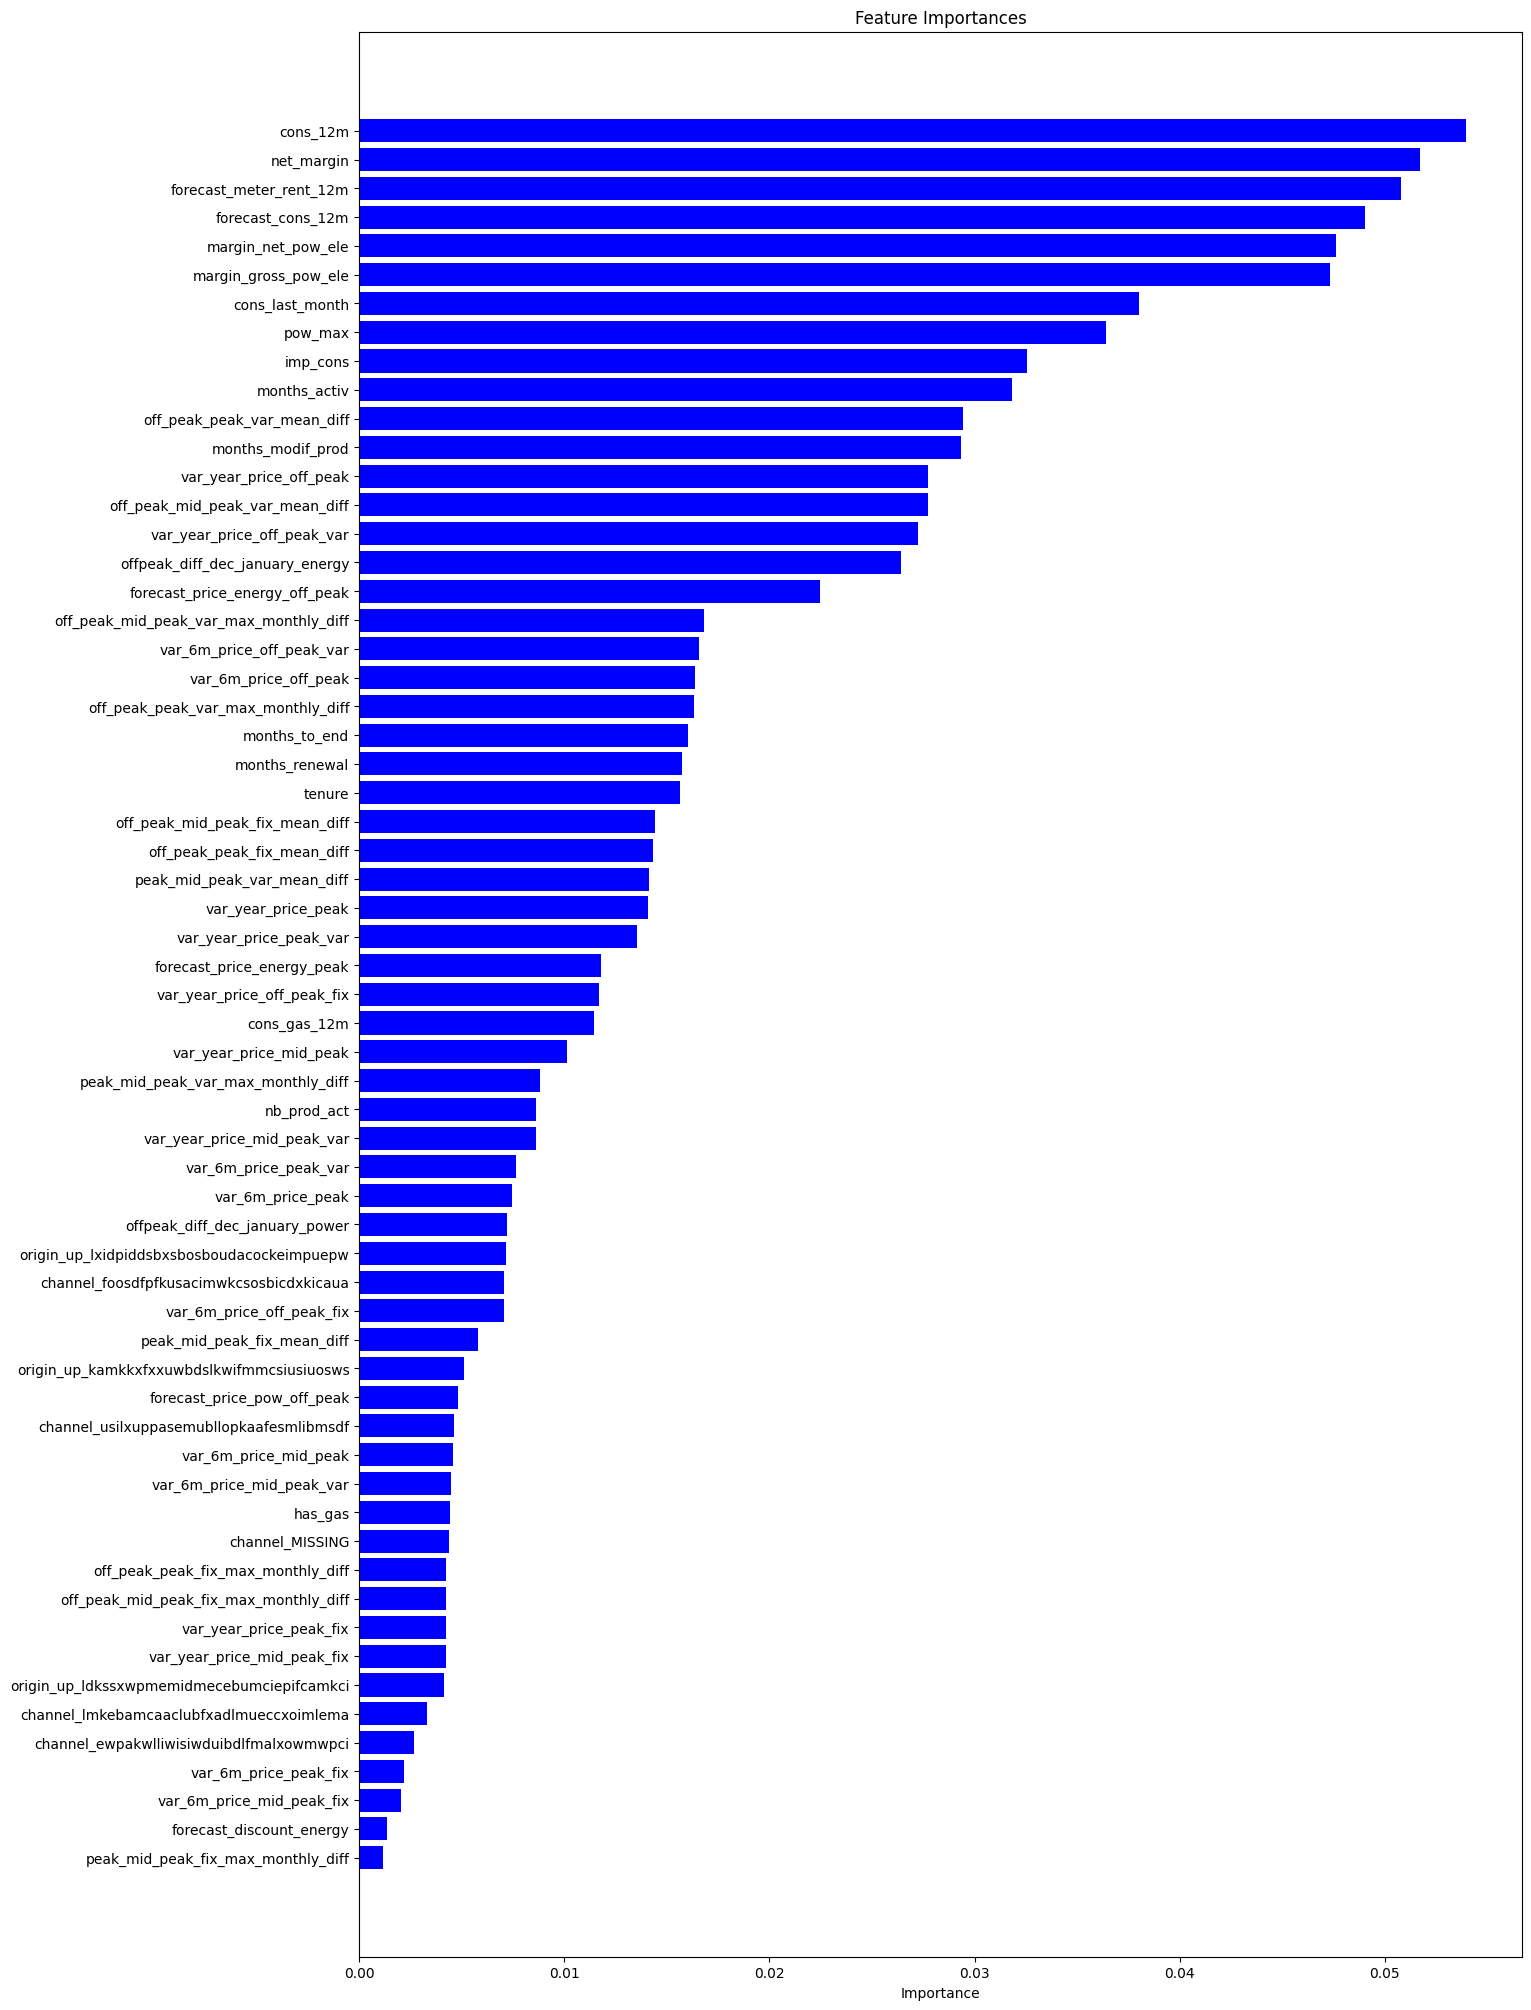

In [18]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

## Results
- Net margin and consumption over 12 months is a top feature for churn in this model.

 PS: However, based on the current dataset, it appears that price is not the primary factor contributing to churn

In [22]:
# Calculate the probabilities of churn for the test data
y_prob = rf_model.predict_proba(X_test)[:, 1]
print(y_prob)

[0.115 0.163 0.02  ... 0.019 0.06  0.282]


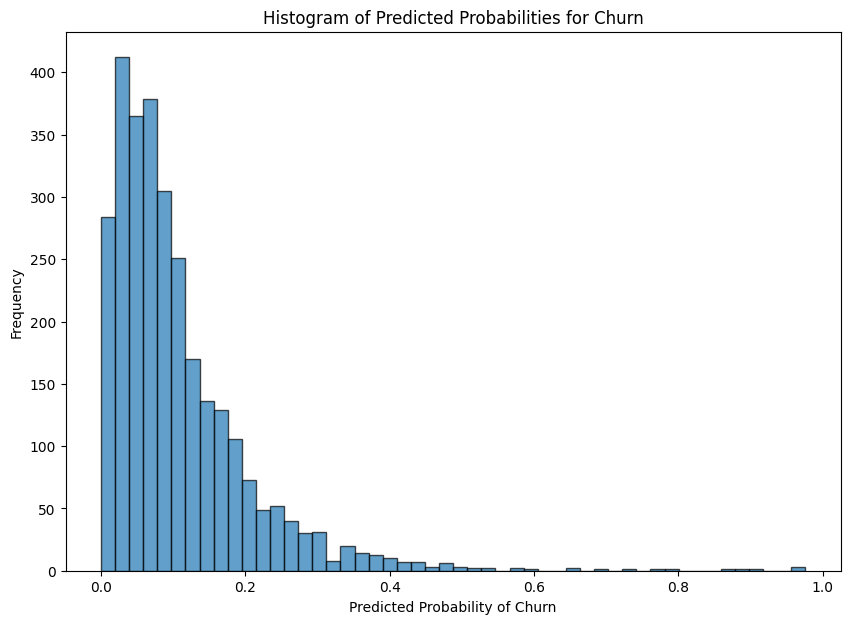

In [23]:
plt.figure(figsize=(10, 7))
plt.hist(y_prob, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities for Churn')
plt.show()

# overall
The current model, identify some high-risk customers, but tends to predict a low probability of churn for most customers.

The features used to train the model might not be sufficiently informative or predictive of churn.

suggestion: re work on the feature engineering 
